**BUSINESS PROBLEM**
* Preventing the credit card frauds/unauthorized transactions, as the primary goal is to minimize financial losses for both credit card companies and cardholders while maximizing the convenience of legitimate transactions.
* So using the data the goal
is to predict the future trasaction a genuine or a fraud.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
!pip install XGBoost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* A lot of variables we have in the dataset are not interpretable and are in such a way to ensure the privacy of customers, and these variables from V1 to V28 are principal components of the actual data.

* Time represents the duration (in seconds) between the first transaction and the current transaction.

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.duplicated().sum()

1081

In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [11]:
print('The % of genuine transactions in the dataset:', round(df['Class'].value_counts()[0]/len(df), 3))
print('The % of fraud transactions in the dataset:', round(df['Class'].value_counts()[1]/len(df), 3))

The % of genuine transactions in the dataset: 0.998
The % of fraud transactions in the dataset: 0.002


* The Dataset is highly imbalanced.






In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


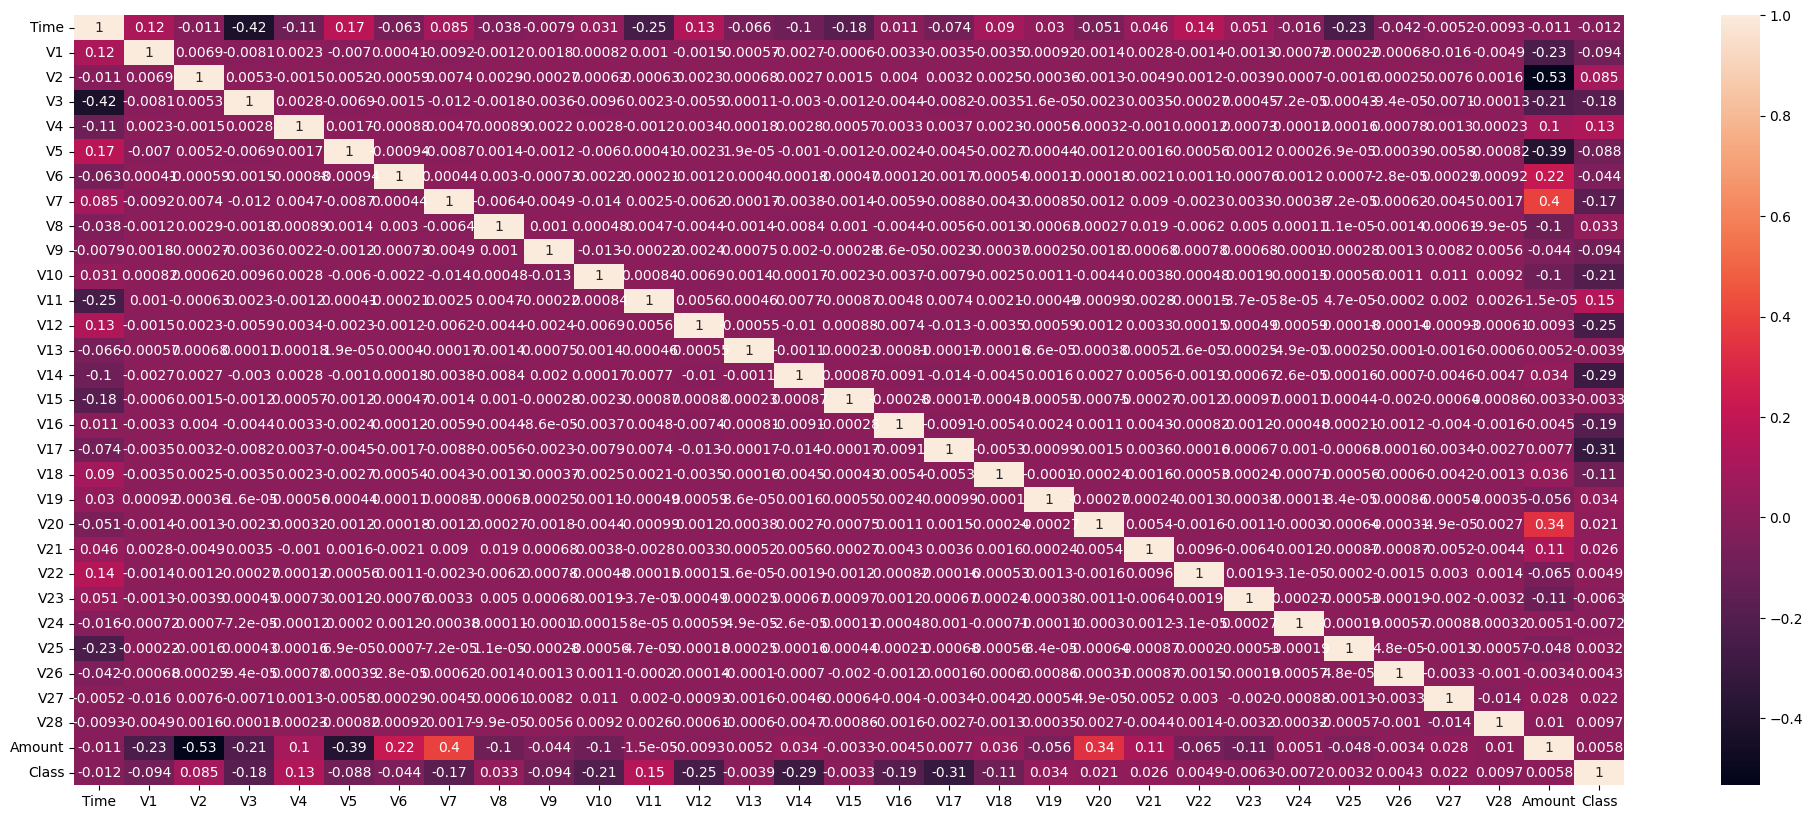

In [13]:
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
print('The Average amount of fraud transcations is:', df[df['Class']==1]['Amount'].mean())
print('The Average amount of genuine transcations is:', df[df['Class']==0]['Amount'].mean())

The Average amount of fraud transcations is: 123.87186046511628
The Average amount of genuine transcations is: 88.41357475472456


In [15]:
df['Hrs']=np.floor(df['Time']/3600)

Text(0.5, 0, 'Time_Hours')

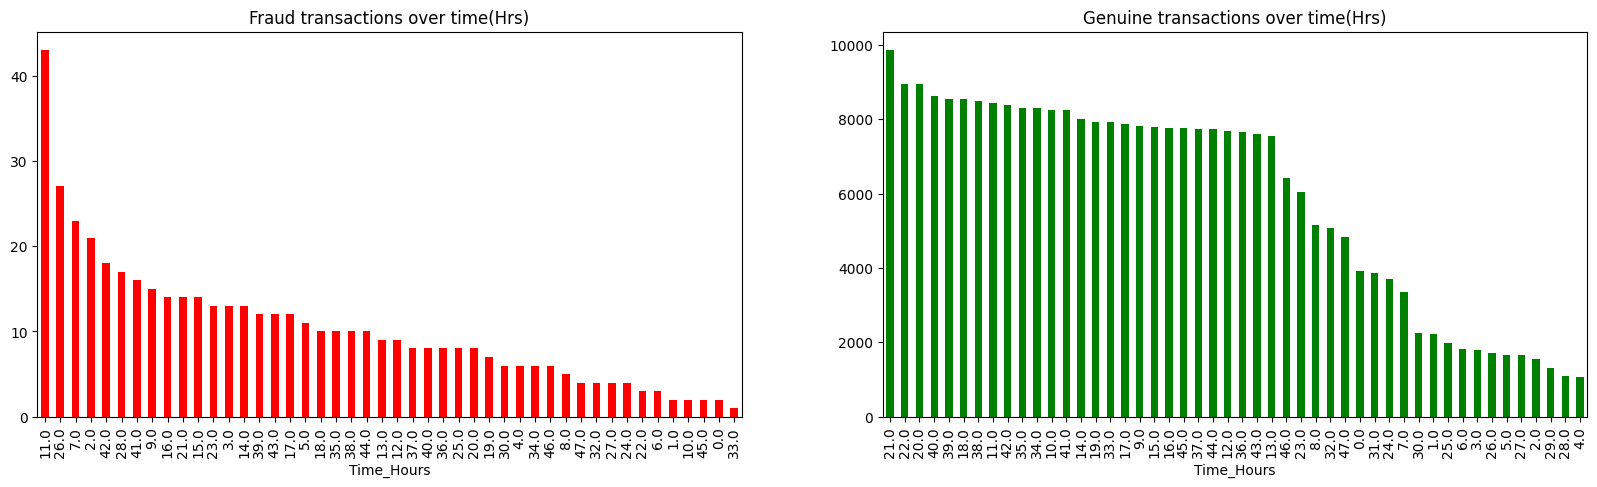

In [16]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
df[df['Class']==1]['Hrs'].value_counts().plot(kind='bar', color='red')
plt.title('Fraud transactions over time(Hrs)')
plt.xlabel('Time_Hours')

plt.subplot(1,2,2)
df[df['Class']==0]['Hrs'].value_counts().plot(kind='bar', color='green')
plt.title('Genuine transactions over time(Hrs)')
plt.xlabel('Time_Hours')

Text(0, 0.5, 'Avg Amount')

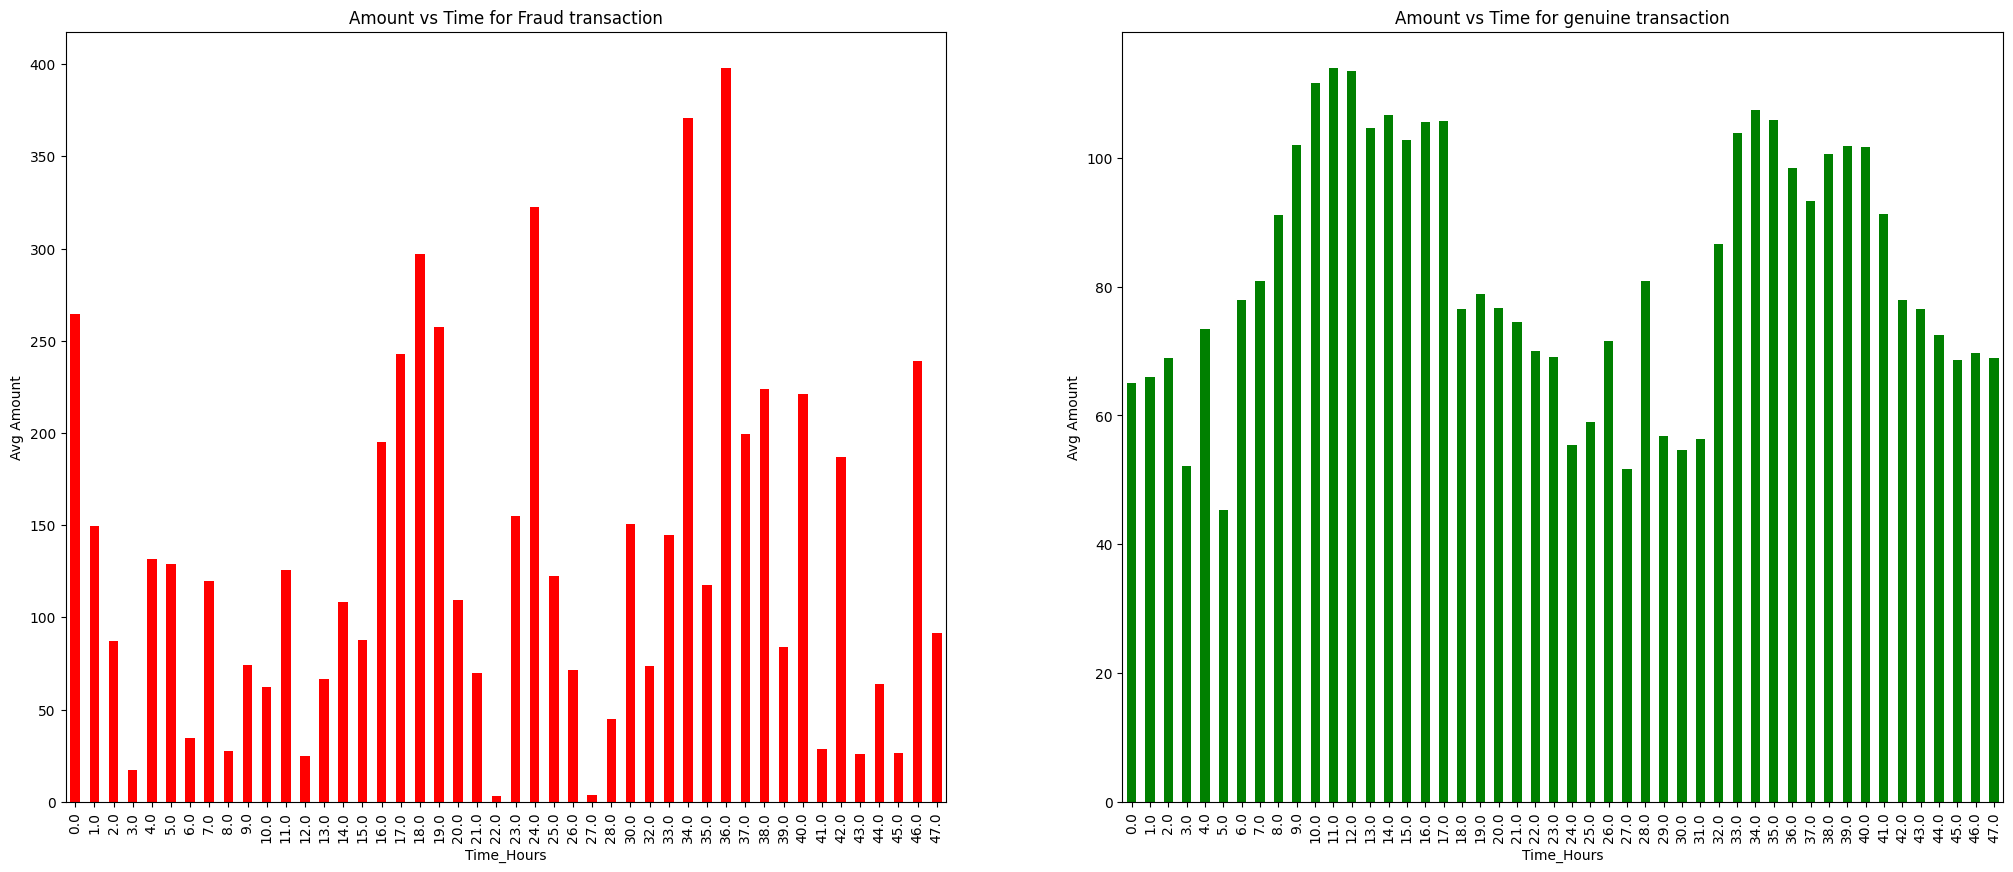

In [17]:
plt.figure(figsize=(25, 10))
plt.subplot(1,2,1)
df[df['Class']==1].groupby('Hrs')['Amount'].mean().plot(kind='bar', color='red')
plt.title('Amount vs Time for Fraud transaction')
plt.xlabel('Time_Hours')
plt.ylabel('Avg Amount')

plt.subplot(1,2,2)
df[df['Class']==0].groupby('Hrs')['Amount'].mean().plot(kind='bar', color='green')
plt.title('Amount vs Time for genuine transaction')
plt.xlabel('Time_Hours')
plt.ylabel('Avg Amount')

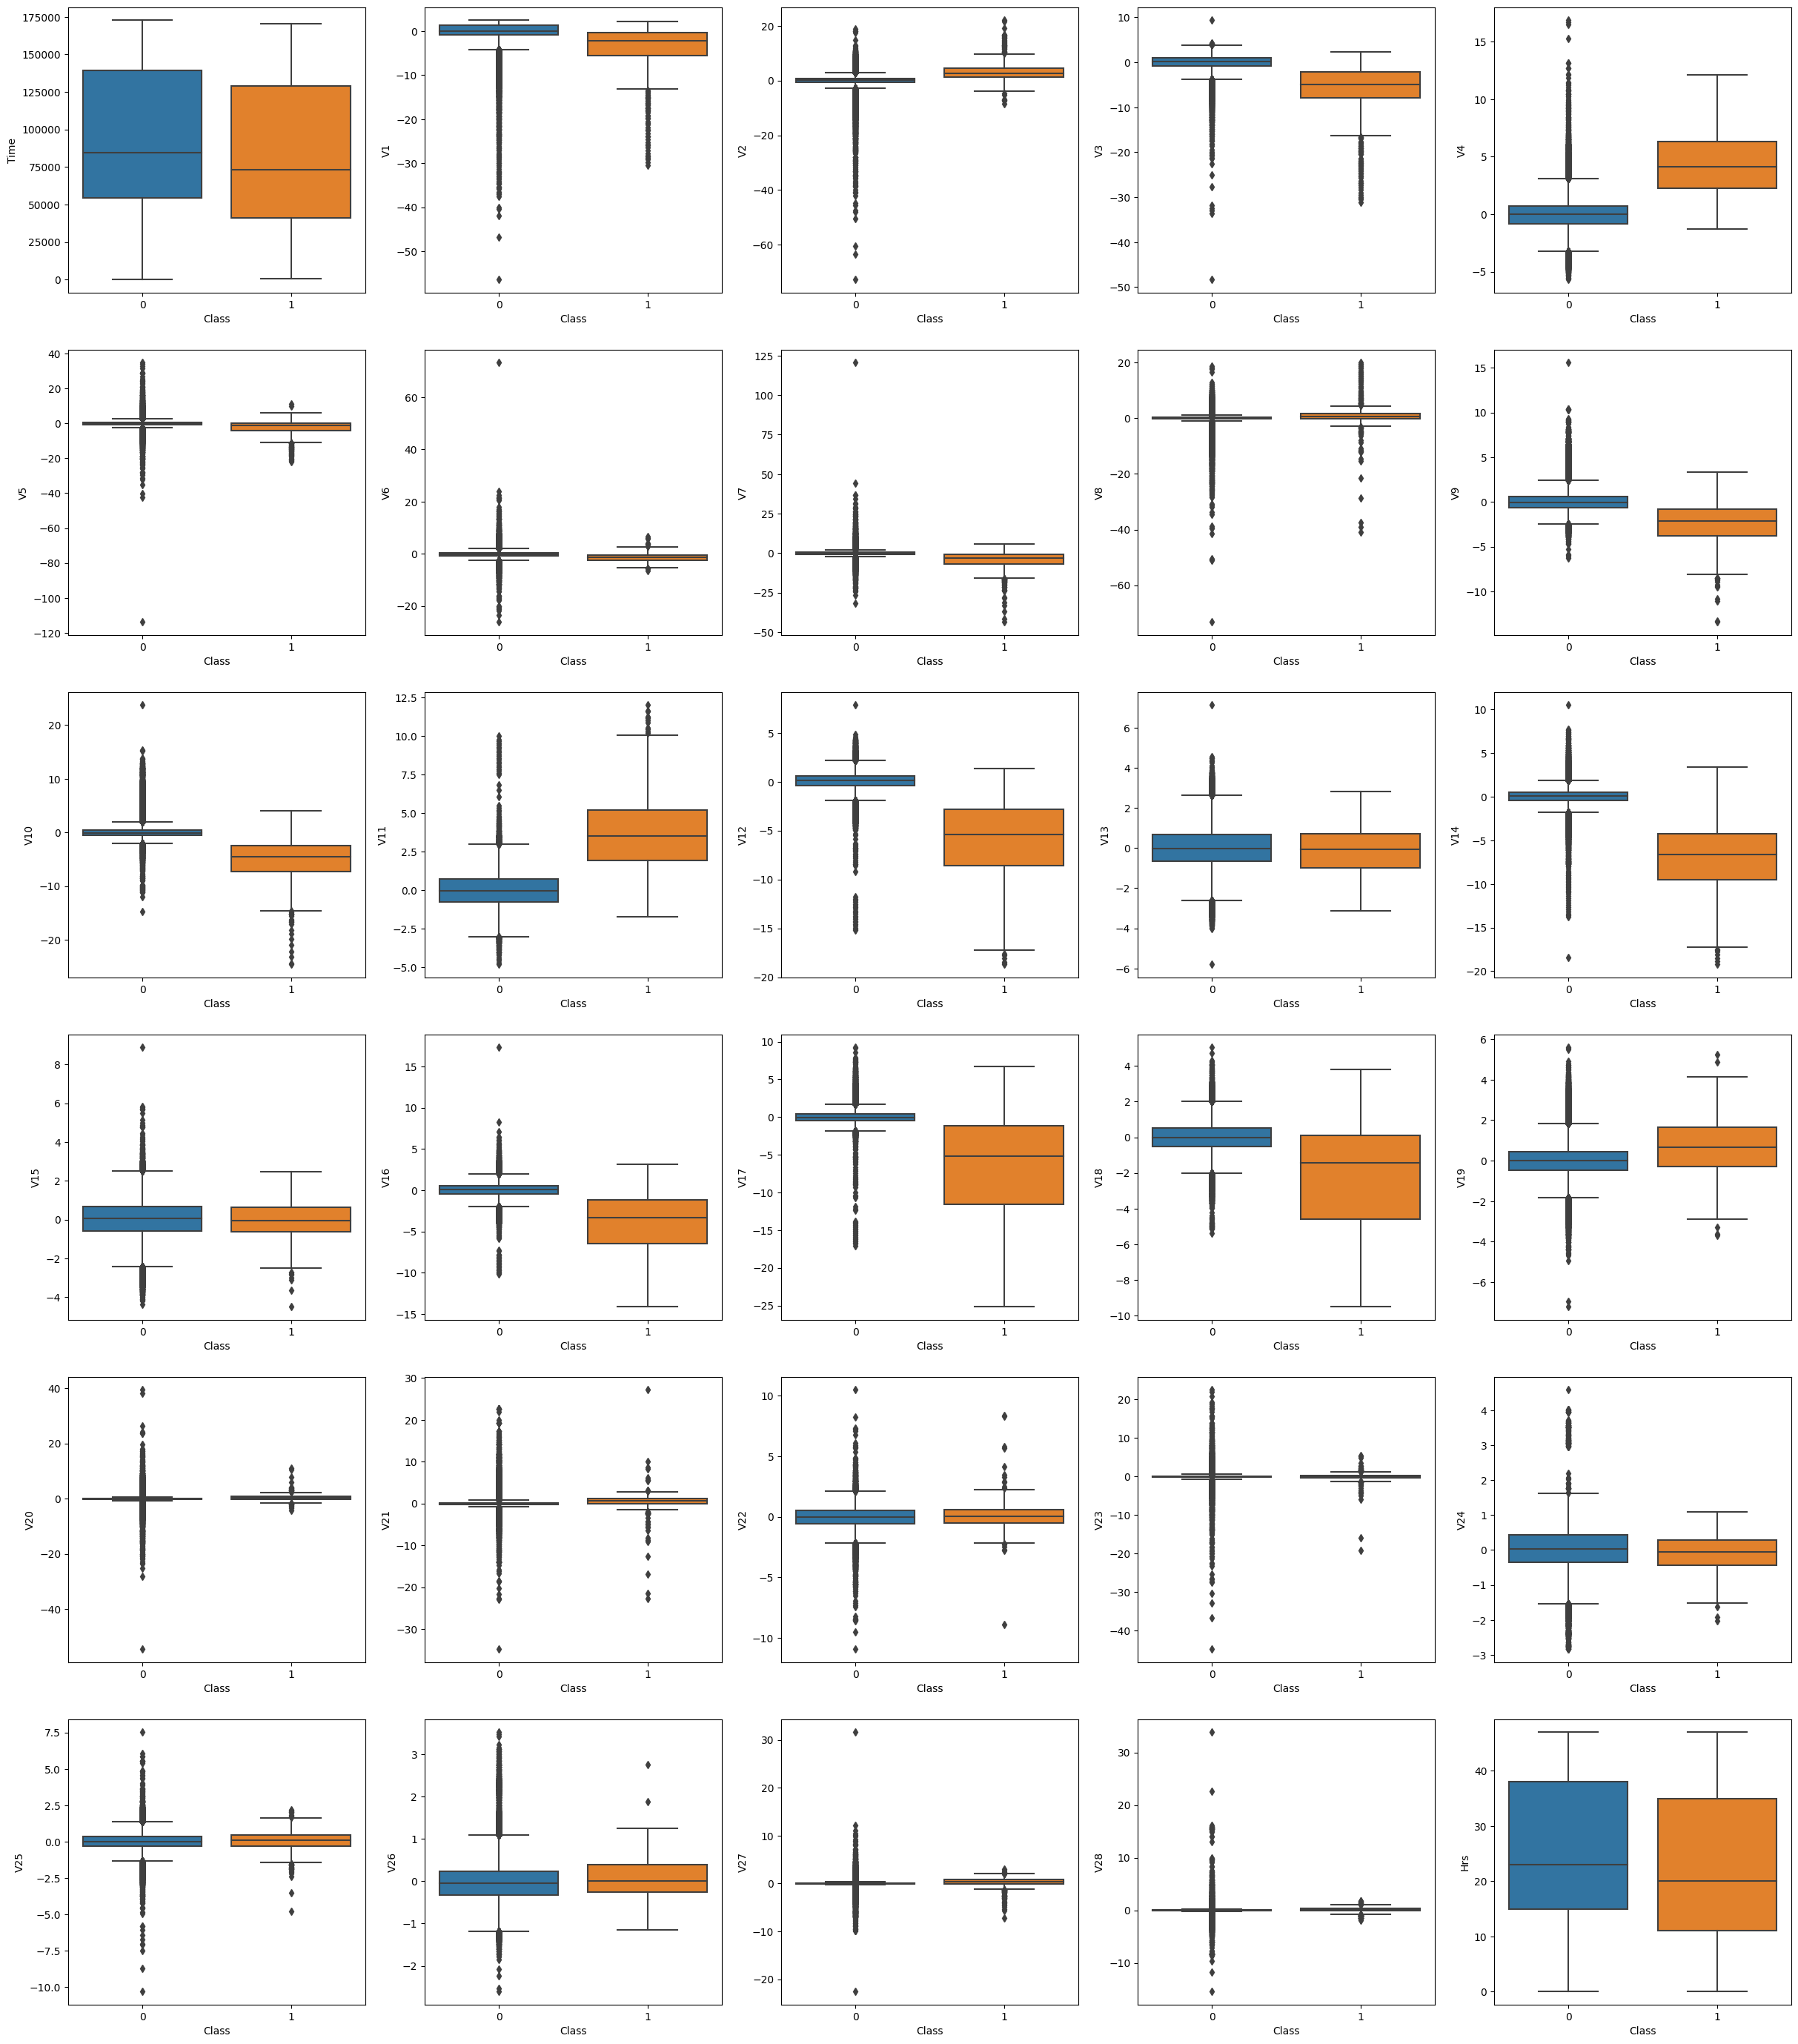

In [18]:
plt.figure(figsize=(30, 35))
j=1

for i in df.drop(['Class', 'Amount'], axis=1).columns:
  plt.subplot(6,5,j)
  sns.boxplot(x=df['Class'], y=df[i])
  j=j+1

plt.show()

* Variables V2, V4, V11, V19 are positively corelated with Class variable. The Higher these values are more likely the transaction being fraud.

* Variables V10, V12, V14, V17 are negatively corelated with Class variable. The Lower these values are more likely the transaction is fraud.

**Converting Imbalanced data to Balanced data**

In [19]:
X=df.drop(['Hrs', 'Class'], axis=1)
y=df['Class']

In [20]:
print(X.shape)
print(y.shape)

(283726, 30)
(283726,)


In [21]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_new, y_new= smote.fit_resample(X, y)

In [22]:
print(X_new.shape)
print(y_new.shape)

(566506, 30)
(566506,)


In [23]:
y_new.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.8, random_state=9)

In [25]:
# SCALING
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
X=sc.transform(X)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
!pip install XGBoost
from xgboost import XGBClassifier

In [27]:
models={'Logistic_Regression': LogisticRegression(), 'KNN': KNeighborsClassifier(), 'SVC': SVC(),
        'Decision_Tree':DecisionTreeClassifier(), 'Random_Forest': RandomForestClassifier(), 'ADA Boost': AdaBoostClassifier(),
        'GradientBoost': GradientBoostingClassifier(), 'XGBoost': XGBClassifier()
        }

In [194]:
Train=[]
Test=[]
CV=[]


for model, clf in models.items():
  clf.fit(X_train, y_train)

  Train_pred=clf.predict(X_train)
  Test_pred=clf.predict(X_test)

  Train.append(accuracy_score(Train_pred, y_train))
  Test.append(accuracy_score(Test_pred, y_test))
  CV.append(cross_val_score(clf, X, y, cv=5).mean())
  print('-'*10, model, '-'*10)
  print('Train_Accuracy_score:', accuracy_score(Train_pred, y_train))
  print('Test_Accuracy_score:', accuracy_score(Test_pred, y_test))
  print('CV_score', cross_val_score(clf, X, y, cv=5).mean())
  print('Classification_report:\n', classification_report(Test_pred, y_test))
  print('Cofusion_Matrix:\n', confusion_matrix(Test_pred, y_test))

  print('*'*120)

---------- Logistic_Regression ----------
Train_Accuracy_score: 0.9990483743061063
Test_Accuracy_score: 0.9991761424965085
CV_score 0.9991223931160584
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    226726
           1       0.59      0.87      0.70       255

    accuracy                           1.00    226981
   macro avg       0.80      0.93      0.85    226981
weighted avg       1.00      1.00      1.00    226981

Cofusion_Matrix:
 [[226572    154]
 [    33    222]]
************************************************************************************************************************
---------- KNN ----------
Train_Accuracy_score: 0.9995065644550181
Test_Accuracy_score: 0.9992686612535852
CV_score 0.9992950954946913
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    226693
           1       0.66      0.86      0.75       288

 

**RESULTS:**

Among all the algorithms used Logistic Regression,KNN Classifier, SVC and XGB Classifier produced the best
results, but we can finalize the XGB Classifier - The reason behind it is that, since we are dealing
with the finance domain (default), we need to prevent fraudulent credit card transactions while minimizing false positives (legitimate transactions incorrectly flagged as fraud) i.e., least False Positives (FP), if we look at the
above results Logistic Regression, KNN, SVC, XGBoost produced 154, 127, 211 and 98 FPs' respectively


In [28]:
final_model=XGBClassifier()
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
from joblib import dump
dump(final_model, 'Creditcard_default.joblib')

['Creditcard_default.joblib']